In [ ]:
### data cleaned and processed

In [ ]:
import pandas as pd

# Put all specific CSV file paths into the list
csv_files = [
    r'D:\5507\小红书\新建文件夹\w港硕租房避雷.csv',
    r'D:\5507\小红书\新建文件夹\w香港房东避雷.csv',
    r'D:\5507\小红书\新建文件夹\w香港黑心房东.csv',
    r'D:\5507\小红书\新建文件夹\w香港黑心中介.csv',
    r'D:\5507\小红书\新建文件夹\w香港租房避雷.csv',
    r'D:\5507\小红书\新建文件夹\w香港租房防骗.csv',
    r'D:\5507\小红书\新建文件夹\港硕租房避雷_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\港硕租房避雷output刘.csv',
    r'D:\5507\小红书\新建文件夹\香港房东避雷_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\香港房东避雷output刘.csv',
    r'D:\5507\小红书\新建文件夹\香港黑心房东_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\香港黑心中介_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\香港租房避雷_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\香港租房避雷output刘.csv',
    r'D:\5507\小红书\新建文件夹\香港租房防骗_殷_output.csv',
    r'D:\5507\小红书\新建文件夹\香港租房防骗output刘.csv'
]

# Read in and merge all CSV files
dataframes = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dataframes, ignore_index=True)

# Remove duplicate rows with the same content in the second column
combined_df = combined_df.drop_duplicates(subset=combined_df.columns[1], keep='first')

# Save the merged data as a new CSV file
combined_df.to_csv('combined_output.csv', index=False, encoding='utf-8-sig')

print("合并完成，结果已保存到 combined_output.csv")


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import re

# Read the CSV file
df = pd.read_csv(r'D:\5507\小红书\filtered_combined_output.csv')

# Assume the fourth column is named 'date'
def parse_date(date_str):
    # Remove redundant spaces
    date_str = date_str.strip()

    today = datetime(2024, 11, 10)  # Assume today is November 10th
    
    # Deal with “today” or “X days ago”
    if '今天' in date_str:
        return today
    elif '天前' in date_str:
        days_ago = int(date_str.split('天前')[0])  # Extract the number
        return today - timedelta(days=days_ago)
    
    # Deal with "yesterday"
    if '昨天' in date_str:
        return today - timedelta(days=1)
    
    # Deal with the format "MM-DD", assume the year is 2024
    # For example: '08-10', '10-26', '07-28'
    month_day_pattern = r'(\d{1,2})-(\d{1,2})'  # Correct regular expressions
    match = re.match(month_day_pattern, date_str)
    if match:
        month = int(match.group(1))
        day = int(match.group(2))
        # Specify the current year is 2024
        try:
            return datetime(2024, month, day)
        except ValueError:  # Deal with invalid date, such as Feburary 30th
            print(f"无效日期: {date_str}")
            return pd.NaT
    
    # Deal with the format of "月日"
    month_day_cn_pattern = r'(\d{1,2})月(\d{1,2})日'
    match_cn = re.match(month_day_cn_pattern, date_str)
    if match_cn:
        month = int(match_cn.group(1))
        day = int(match_cn.group(2))
        # Specify the current year is 2024
        try:
            return datetime(2024, month, day)
        except ValueError:
            print(f"无效日期: {date_str}")
            return pd.NaT

    # Try parsing dates in other formats
    date_formats = ['%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y', '%Y年%m月%d日', '%d-%m-%Y', '%Y/%m/%d']
    
    for date_format in date_formats:
        try:
            return datetime.strptime(date_str, date_format)
        except ValueError:
            continue  # If the current format does not match, continue trying other formats
    
    # If all formats fail to match, print out an error message for easy debugging
    print(f"无法解析日期: {date_str}")
    return pd.NaT  # 无法解析的日期返回NaT

# Apply date parsing functions and standardize the format
df['date'] = df['date'].apply(parse_date)

# Harmonize date columns to YYYY-MM-DD format
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

# Save the cleaned file
df.to_csv('cleaned_file.csv', index=False)

print("清洗后的数据已保存。")


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/Users/youtingliu/Desktop/港硕/课程资料/Thur.com5104research methods/5507数据/filtered_combined_output.csv"  # Replace this with the path to your CSV file
df = pd.read_csv(file_path)


# Replace "赞" in the "like" column with "0"
if "like" in df.columns:
    df["like"] = df["like"].replace("赞", "0")

# Replace "收藏" in the "collect" column with "0"
if "collect" in df.columns:
    df["collect"] = df["collect"].replace("收藏", "0")

 # Replace "评论" in the "comment" column with "0"
if "comment" in df.columns:
    df["comment"] = df["comment"].replace("评论", "0")


# Specify the path to save the updated CSV file
output_path = "/Users/youtingliu/Desktop/updated_file.csv"  # Specify the output file path
df.to_csv(output_path, index=False)

print(f"The updated CSV has been saved to {output_path}")

In [ ]:
### data analysis

In [ ]:
import pandas as pd

# Read the merged CSV file
combined_df = pd.read_csv(r'D:\5507\小红书\combined_output.csv', encoding='utf-8-sig')

# Filter out rows containing '深圳', '广州','优才','上海','高才','长沙','哈尔滨','合肥' in the second column.
keywords = ['深圳', '广州','优才','上海','高才','长沙','哈尔滨','合肥']
combined_df = combined_df[~combined_df[combined_df.columns[1]].str.contains('|'.join(keywords), na=False)]

# Save filtered data as a new CSV file
combined_df.to_csv('filtered_combined_output.csv', index=False, encoding='utf-8-sig')

print("过滤完成，结果已保存到 filtered_combined_output.csv")


In [2]:
import os  # Import modules
os.chdir(r'/Users/ringmum/Desktop/测试2/lda' )  # Switching to the destination path r prefix indicates that this is a raw string, and the \ is not escaped
print(os.getcwd())  # Function to get the current working directory, that is, the directory path where the current Python script is working

/Users/ringmum/Desktop/测试2/lda


# Read the data set

In [4]:
import pandas as pd
import jieba
from collections import Counter

# read the dataset
df =  pd.read_excel('cleaned_file_ansi.xlsx')
df

,url,title,content,date,like,comment,collect
0,https://www.xiaohongshu.com/search_result/6730...,????港硕女孩首选 酒店式公寓转租！！！,?一些真心住户体验： 本人在这边生活了两个多月 交通非常方便 就和住在酒店里一样 储物空间很...,2024-11-10,3,1,1
1,https://www.xiaohongshu.com/search_result/66b7...,????港硕租房经验帖 完美要回押金???,历时7周，在8.10中午我终于分三次拿回了我的全部租房押金3.2w???????? 非常感谢...,2024-08-10,3,39,196
2,https://www.xiaohongshu.com/search_result/66d1...,港城地狱开局,海湾轩十一月前租不到，henley要一口气交30w一年房租+一个月押金，做后兜兜转转看到了k...,2024-08-30,3,231,54
3,https://www.xiaohongshu.com/search_result/666f...,香港????港硕留学租房&避雷攻略分享【2】,四、租房避坑 ①无良中介卷钱跑路(看中介的公司官网有无这个人，名片，与你对接的是不是 始终都...,2024-06-17,3,3,102
4,https://www.xiaohongshu.com/search_result/671d...,????港硕合租避雷不讲卫生室友（求除臭剂）,在香港租房，一共有两个房间，房间面积都很小，合租的室友极其不讲卫生：1、在香港这个天气之下，...,2024-10-26,3,21,7
...,...,...,...,...,...,...,...
847,https://www.xiaohongshu.com/search_result/66c0...,租房傻傻被骗，再也不相信中介了！！！,笑拥了，家人们。起因是月底房子到期，无意间在高德上看到了这个小区房子出租信息，看见那个价格我...,2024-08-17,93,19,2
848,https://www.xiaohongshu.com/search_result/6708...,香港租房｜粉嶺聯和墟,房源介绍： 自家房子，三房两厅，两个阳台，转租小房，6000/月(包水电煤wifi)，卫生间...,2024-10-11,93,12,13
849,https://www.xiaohongshu.com/search_result/6703...,7k沙田第一城转租???????♀???,因个人在深圳实习（不是中介）。该房位于沙田第一城，两房一厅，室友是浸会学生（韩国人????）...,2024-10-17,34,15,40
850,https://www.xiaohongshu.com/search_result/66ec...,（已租出）香港????租房，無中介費，一房一廳,轉租！ \t 沙田圍地鐵站口 300 米 離城大、浸會、恆大很近 所見即所得，居住很安靜，周...,2024-09-29,5,45,121


In [5]:
# 修改列名
df.rename(columns={'content': 'text'}, inplace=True)
df['text']

0      ?一些真心住户体验： 本人在这边生活了两个多月 交通非常方便 就和住在酒店里一样 储物空间很...
1      历时7周，在8.10中午我终于分三次拿回了我的全部租房押金3.2w???????? 非常感谢...
2      海湾轩十一月前租不到，henley要一口气交30w一年房租+一个月押金，做后兜兜转转看到了k...
3      四、租房避坑 ①无良中介卷钱跑路(看中介的公司官网有无这个人，名片，与你对接的是不是 始终都...
4      在香港租房，一共有两个房间，房间面积都很小，合租的室友极其不讲卫生：1、在香港这个天气之下，...
                             ...                        
847    笑拥了，家人们。起因是月底房子到期，无意间在高德上看到了这个小区房子出租信息，看见那个价格我...
848    房源介绍： 自家房子，三房两厅，两个阳台，转租小房，6000/月(包水电煤wifi)，卫生间...
849    因个人在深圳实习（不是中介）。该房位于沙田第一城，两房一厅，室友是浸会学生（韩国人????）...
850    轉租！ \t 沙田圍地鐵站口 300 米 離城大、浸會、恆大很近 所見即所得，居住很安靜，周...
851    香港何文田黄金地段，靠近地铁站、公交站，让你轻松畅行整个城市#香港租房#香港租房攻略#香港租...
Name: text, Length: 852, dtype: object

# 1.Text cleaning：
For the line breaks, spaces, and ordinal numbers in the original text, simply cleanse the text content, remove line breaks and spaces, and cleanse ordinal numbers

In [7]:
# Regular expression
r1 = r'[\s+\.!\/_,$%^*(+\"\')]+|[:：+——()?【】“”！，。？、~@#￥%%……&*（）]+'  # Delete the punctuation
r2 = r'[^\u4e00-\u9fa5]'  # Delete English and numbers
r3 = r'(@[^\s]+)'  # Delete comments with@



# Text denoising
df['text'] = df['text'].str.replace(r1, '', regex=True)  # Delete the punctuation
df['text'] = df['text'].str.replace(r2, '', regex=True)  # Delete English and numbers
df['text'] = df['text'].str.replace(r3, '', regex=True)  # Delete comments with@



# Remove the overlap
df.drop_duplicates(subset='text', keep='first', inplace=True)

# Remove the null value
df.dropna(subset=['text'], inplace=True)

# Print the results
cleaned_texts = df['text']
print(cleaned_texts)

0      一些真心住户体验本人在这边生活了两个多月交通非常方便就和住在酒店里一样储物空间很足我夏天冬天...
1      历时周在中午我终于分三次拿回了我的全部租房押金非常感谢在三次元和小红书给出意见和帮助的朋友们...
2      海湾轩十一月前租不到要一口气交一年房租一个月押金做后兜兜转转看到了听大家评论褒贬不一跟对比怎...
3      四租房避坑无良中介卷钱跑路看中介的公司官网有无这个人名片与你对接的是不是始终都是同一个中介被...
4      在香港租房一共有两个房间房间面积都很小合租的室友极其不讲卫生在香港这个天气之下不是每天都洗澡...
                             ...                        
847    笑拥了家人们起因是月底房子到期无意间在高德上看到了这个小区房子出租信息看见那个价格我疯狂心动...
848    房源介绍自家房子三房两厅两个阳台转租小房月包水电煤卫生间阳台公用楼下有会所泳池健身房基本家具...
849    因个人在深圳实习不是中介该房位于沙田第一城两房一厅室友是浸会学生韩国人人很好安静爱干净时间年...
850    轉租沙田圍地鐵站口米離城大浸會恆大很近所見即所得居住很安靜周圍也很便利香港租房香港城大租房香...
851    香港何文田黄金地段靠近地铁站公交站让你轻松畅行整个城市香港租房香港租房攻略香港租房买房香港租...
Name: text, Length: 851, dtype: object


In [8]:
df

,url,title,text,date,like,comment,collect
0,https://www.xiaohongshu.com/search_result/6730...,????港硕女孩首选 酒店式公寓转租！！！,一些真心住户体验本人在这边生活了两个多月交通非常方便就和住在酒店里一样储物空间很足我夏天冬天...,2024-11-10,3,1,1
1,https://www.xiaohongshu.com/search_result/66b7...,????港硕租房经验帖 完美要回押金???,历时周在中午我终于分三次拿回了我的全部租房押金非常感谢在三次元和小红书给出意见和帮助的朋友们...,2024-08-10,3,39,196
2,https://www.xiaohongshu.com/search_result/66d1...,港城地狱开局,海湾轩十一月前租不到要一口气交一年房租一个月押金做后兜兜转转看到了听大家评论褒贬不一跟对比怎...,2024-08-30,3,231,54
3,https://www.xiaohongshu.com/search_result/666f...,香港????港硕留学租房&避雷攻略分享【2】,四租房避坑无良中介卷钱跑路看中介的公司官网有无这个人名片与你对接的是不是始终都是同一个中介被...,2024-06-17,3,3,102
4,https://www.xiaohongshu.com/search_result/671d...,????港硕合租避雷不讲卫生室友（求除臭剂）,在香港租房一共有两个房间房间面积都很小合租的室友极其不讲卫生在香港这个天气之下不是每天都洗澡...,2024-10-26,3,21,7
...,...,...,...,...,...,...,...
847,https://www.xiaohongshu.com/search_result/66c0...,租房傻傻被骗，再也不相信中介了！！！,笑拥了家人们起因是月底房子到期无意间在高德上看到了这个小区房子出租信息看见那个价格我疯狂心动...,2024-08-17,93,19,2
848,https://www.xiaohongshu.com/search_result/6708...,香港租房｜粉嶺聯和墟,房源介绍自家房子三房两厅两个阳台转租小房月包水电煤卫生间阳台公用楼下有会所泳池健身房基本家具...,2024-10-11,93,12,13
849,https://www.xiaohongshu.com/search_result/6703...,7k沙田第一城转租???????♀???,因个人在深圳实习不是中介该房位于沙田第一城两房一厅室友是浸会学生韩国人人很好安静爱干净时间年...,2024-10-17,34,15,40
850,https://www.xiaohongshu.com/search_result/66ec...,（已租出）香港????租房，無中介費，一房一廳,轉租沙田圍地鐵站口米離城大浸會恆大很近所見即所得居住很安靜周圍也很便利香港租房香港城大租房香...,2024-09-29,5,45,121


In [9]:
#Save the cleaned data
df['text'].to_csv('simpleclean.csv',encoding='utf-8',index=False)
df.to_csv('simpleclean1.csv',encoding='utf-8',index=False)

In [10]:
import pandas as pd
import jieba
from collections import Counter

# read the data
data = pd.read_csv('simpleclean1.csv')  # import data
data

,url,title,text,date,like,comment,collect
0,https://www.xiaohongshu.com/search_result/6730...,????港硕女孩首选 酒店式公寓转租！！！,一些真心住户体验本人在这边生活了两个多月交通非常方便就和住在酒店里一样储物空间很足我夏天冬天...,2024-11-10,3,1,1
1,https://www.xiaohongshu.com/search_result/66b7...,????港硕租房经验帖 完美要回押金???,历时周在中午我终于分三次拿回了我的全部租房押金非常感谢在三次元和小红书给出意见和帮助的朋友们...,2024-08-10,3,39,196
2,https://www.xiaohongshu.com/search_result/66d1...,港城地狱开局,海湾轩十一月前租不到要一口气交一年房租一个月押金做后兜兜转转看到了听大家评论褒贬不一跟对比怎...,2024-08-30,3,231,54
3,https://www.xiaohongshu.com/search_result/666f...,香港????港硕留学租房&避雷攻略分享【2】,四租房避坑无良中介卷钱跑路看中介的公司官网有无这个人名片与你对接的是不是始终都是同一个中介被...,2024-06-17,3,3,102
4,https://www.xiaohongshu.com/search_result/671d...,????港硕合租避雷不讲卫生室友（求除臭剂）,在香港租房一共有两个房间房间面积都很小合租的室友极其不讲卫生在香港这个天气之下不是每天都洗澡...,2024-10-26,3,21,7
...,...,...,...,...,...,...,...
846,https://www.xiaohongshu.com/search_result/66c0...,租房傻傻被骗，再也不相信中介了！！！,笑拥了家人们起因是月底房子到期无意间在高德上看到了这个小区房子出租信息看见那个价格我疯狂心动...,2024-08-17,93,19,2
847,https://www.xiaohongshu.com/search_result/6708...,香港租房｜粉嶺聯和墟,房源介绍自家房子三房两厅两个阳台转租小房月包水电煤卫生间阳台公用楼下有会所泳池健身房基本家具...,2024-10-11,93,12,13
848,https://www.xiaohongshu.com/search_result/6703...,7k沙田第一城转租???????♀???,因个人在深圳实习不是中介该房位于沙田第一城两房一厅室友是浸会学生韩国人人很好安静爱干净时间年...,2024-10-17,34,15,40
849,https://www.xiaohongshu.com/search_result/66ec...,（已租出）香港????租房，無中介費，一房一廳,轉租沙田圍地鐵站口米離城大浸會恆大很近所見即所得居住很安靜周圍也很便利香港租房香港城大租房香...,2024-09-29,5,45,121


# 2. word segmentation：

The content segmentation of the cleaned text data is carried out by using jieba.lcut() method.
3. Customize stopwords
4. HGT stop-word list completes stop-word processing

In [12]:
import jieba
import pandas as pd
import itertools
import collections

# Read Stopwords
stopwords = set()
with open('./stop_dict/stopword1.txt', encoding='utf-8') as f:
    stopwords.update(f.read().splitlines())
with open('./stop_dict/stopwords.txt', encoding='utf-8') as f:
    stopwords.update(f.read().splitlines())
stopwords.update([' ', '', '\n', '\t', '\xa0', '\u3000', '�'])

# Customize Dictionairy
jieba.load_userdict('./stop_dict/customword.txt')

# Customize Synonymous Dictionairy
replace_dict = {}
with open('stop_dict/similarword.txt', 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            key, value = parts
            replace_dict[key] = value
        else:
            print(f"Ignoring improperly formatted line: {line}")

# Word preprocessor function
def get_cut_content(x):
    x = x.lower()
    words = jieba.cut(x, cut_all=False, HMM=True)
    final = [replace_dict.get(word, word) for word in words if word not in stopwords and not word.isdigit()]
    return final

# Preprocess the data
text = data['text'].astype(str).map(get_cut_content)
text = text.apply(lambda x: [word for word in x if len(word) > 1])

# Save the preprocessing results to
result_df = pd.DataFrame({'text_cut': text.map(lambda x: ' '.join(x))})
result_df.to_excel('cut2.xlsx', index=False)
result_df.to_csv('cut2.csv', index=False)

# Save the result as txt file
with open('cutdata2.txt', 'w', encoding='utf-8') as file:
    for line in text:
        file.write(' '.join(line) + '\n')



Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/g1/y0np4_71331485tw9q_f35800000gn/T/jieba.cache
Loading model cost 0.981 seconds.
Prefix dict has been built successfully.


In [13]:
# add the participle result as a new column
data['text_cut'] = result_df['text_cut']

# save the data for the result of adding the participle
data.to_excel('with_cut.xlsx', index=False, )  # save as an Excel file with word segmentation results
data.to_csv('with_cut.csv', index=False, encoding='utf-8')  # Save as a CSV file with participle results



In [14]:
data

,url,title,text,date,like,comment,collect,text_cut
0,https://www.xiaohongshu.com/search_result/6730...,????港硕女孩首选 酒店式公寓转租！！！,一些真心住户体验本人在这边生活了两个多月交通非常方便就和住在酒店里一样储物空间很足我夏天冬天...,2024-11-10,3,1,1,真心 住户 体验 多月 交通 酒店 储物 空间 很足 夏天 冬天 放满 茶水 对面 饮用水 ...
1,https://www.xiaohongshu.com/search_result/66b7...,????港硕租房经验帖 完美要回押金???,历时周在中午我终于分三次拿回了我的全部租房押金非常感谢在三次元和小红书给出意见和帮助的朋友们...,2024-08-10,3,39,196,历时 周在 中午 终于 三次 押金 非常感谢 三次 和小红 给出 意见 这件 几点 经验 供...
2,https://www.xiaohongshu.com/search_result/66d1...,港城地狱开局,海湾轩十一月前租不到要一口气交一年房租一个月押金做后兜兜转转看到了听大家评论褒贬不一跟对比怎...,2024-08-30,3,231,54,海湾 十一月 前租 不到 一口气 押金 做后 兜兜 转转 评论 褒贬不一 选档 打算 先租 ...
3,https://www.xiaohongshu.com/search_result/666f...,香港????港硕留学租房&避雷攻略分享【2】,四租房避坑无良中介卷钱跑路看中介的公司官网有无这个人名片与你对接的是不是始终都是同一个中介被...,2024-06-17,3,3,102,避坑 无良 中介 中介 官网 有无 名片 对接 始终 同一个 中介 合租 室友 视频 学生证...
4,https://www.xiaohongshu.com/search_result/671d...,????港硕合租避雷不讲卫生室友（求除臭剂）,在香港租房一共有两个房间房间面积都很小合租的室友极其不讲卫生在香港这个天气之下不是每天都洗澡...,2024-10-26,3,21,7,一共 面积 很小 合租 室友 讲卫生 天气 之下 洗澡 换下 内裤 袜子 堆积 卫生间 盆里...
...,...,...,...,...,...,...,...,...
846,https://www.xiaohongshu.com/search_result/66c0...,租房傻傻被骗，再也不相信中介了！！！,笑拥了家人们起因是月底房子到期无意间在高德上看到了这个小区房子出租信息看见那个价格我疯狂心动...,2024-08-17,93,19,2,起因 月底 到期 无意间 高德上 小区 出租 疯狂 心动 架不住 手指 不听话 在线 就加 ...
847,https://www.xiaohongshu.com/search_result/6708...,香港租房｜粉嶺聯和墟,房源介绍自家房子三房两厅两个阳台转租小房月包水电煤卫生间阳台公用楼下有会所泳池健身房基本家具...,2024-10-11,93,12,13,房源 介绍 三房两厅 阳台 转租 小房 水电 卫生间 阳台 公用 楼下 有会 泳池 健身房 ...
848,https://www.xiaohongshu.com/search_result/6703...,7k沙田第一城转租???????♀???,因个人在深圳实习不是中介该房位于沙田第一城两房一厅室友是浸会学生韩国人人很好安静爱干净时间年...,2024-10-17,34,15,40,实习 中介 该房 位于 沙田 第一 两房一厅 室友 浸会 韩国 安静 干净 年月日 年月日 ...
849,https://www.xiaohongshu.com/search_result/66ec...,（已租出）香港????租房，無中介費，一房一廳,轉租沙田圍地鐵站口米離城大浸會恆大很近所見即所得居住很安靜周圍也很便利香港租房香港城大租房香...,2024-09-29,5,45,121,轉租 沙田 圍地 鐵站 口米 離城大 浸會 恆大 所得 居住 很安靜 周圍 便利 香港城 香...


In [15]:
# Calculate word frequency and word frequency ratio
all_words = list(itertools.chain(*text))
word_counts = collections.Counter(all_words)
total_word_count = sum(word_counts.values())

word_counts_top_with_ratio = []
for word, count in word_counts.items():
    frequency_ratio = count / total_word_count
    word_counts_top_with_ratio.append((word, count, frequency_ratio))

word_counts_top_with_ratio.sort(key=lambda x: x[1], reverse=True)
word_counts_top_with_ratio = word_counts_top_with_ratio[:20]

word_counts_df = pd.DataFrame(word_counts_top_with_ratio, columns=['word', 'count', 'frequency_ratio'])
word_counts_df.to_excel('20word frequency_with_ratio.xlsx', index=False)
word_counts_df.to_csv('20word frequency_with_ratio.csv', index=False)


In [16]:
# Gets word frequency statistics for all words
word_counts_all = word_counts.most_common(len(word_counts))
pd.DataFrame(word_counts_all, columns=['word', 'count']).to_excel('all word frequency1.xlsx', index=0)  # 保存词频统计结果
pd.DataFrame(word_counts_all, columns=['word', 'count']).to_csv('all word frequency1.csv', index=0)  # 保存词频统计结果

In [17]:
#Text Processing

datas=pd.read_csv(f'20word frequency_with_ratio.csv',)
list1=list(datas['word'])
list2=list(datas['count'])
list3=[]
datas.head()

,word,count,frequency_ratio
0,房东,1584,0.025612
1,中介,1184,0.019145
2,合同,591,0.009556
3,押金,382,0.006177
4,看房,219,0.003541


In [18]:
import matplotlib.font_manager as fm   #Find which fonts are already installed on your system
print(fm.findSystemFonts())

['/System/Library/Fonts/Supplemental/NotoSansAdlam-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf', '/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', '/System/Library/Fonts/Supplemental/Comic Sans MS.ttf', '/System/Library/Fonts/Supplemental/Trebuchet MS Bold.ttf', '/System/Library/Fonts/SFNS.ttf', '/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf', '/System/Library/Fonts/Avenir Next Condensed.ttc', '/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', '/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansCypriot-Regular.ttf', '/System/Library/Fonts/Supplemental/Zapfino.ttf', '/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', '/System/Library/Fonts/Supplemental/Kefa.ttc', '/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', '/System/Library/Fonts/Supplemental/Courier New Bold.ttf', '/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Re

In [19]:
import matplotlib.pyplot as plt

print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
Courier New
Courier New
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
Dej

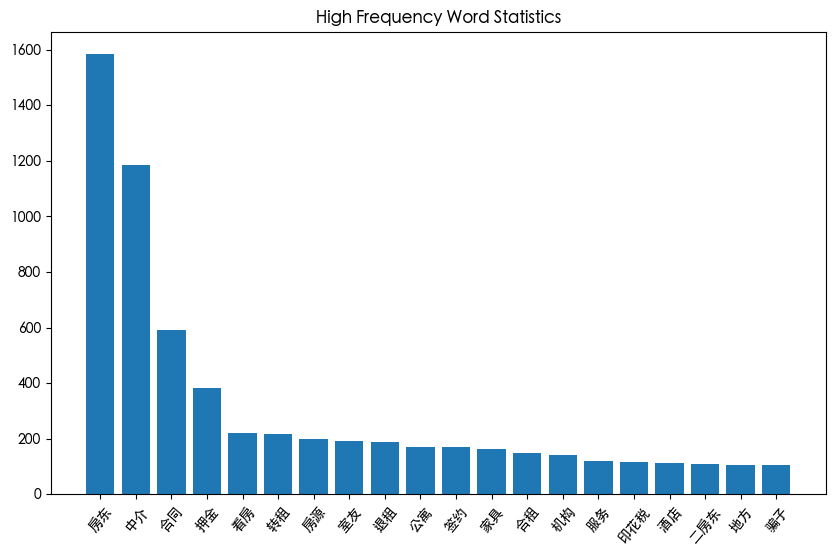

In [20]:
from matplotlib import font_manager
import matplotlib
font_prop = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc')
plt.rcParams["font.sans-serif"] = [ 'SimHei' ]  # Set the Chinese font display
plt.rcParams["axes.unicode_minus"] = False  # The negative sign appears normally
plt.rcParams['font.family'] = 'Heiti TC'
%matplotlib inline
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)
import pandas as pd
# Assume that the datas are the data sets that you have prepared, containing the word and count columns
plt.figure(figsize=(10, 6))
plt.title('High Frequency Word Statistics')
plt.bar(datas['word'], datas['count'])
plt.xticks(rotation=50)
plt.savefig('Historic.png')
plt.show()

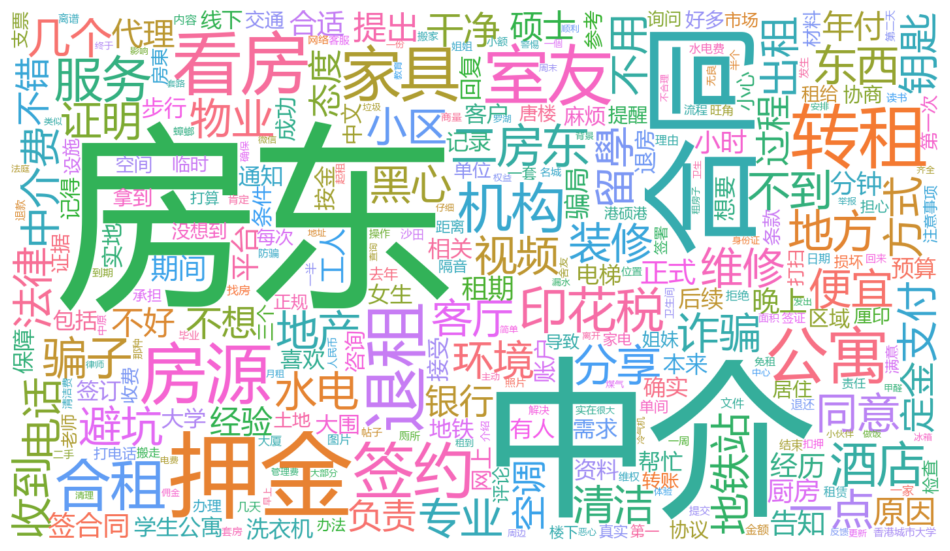

In [21]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Assume that you have created a word variable for word frequency statistics

# Load the background picture
background = np.array(Image.open('./data/mask.jpg'))

# Creates a word cloud object
wc = WordCloud(
               background_color='white',
               mode='RGB',
               mask=background,
               max_words=300,
               font_path='./data/msyh.ttc',  # 请注意在路径中使用双斜杠或原始字符串表示
               max_font_size=150,
               relative_scaling=0.6,
               random_state=50,
               scale=2,
               colormap=sns.color_palette("husl", 10, as_cmap=True)
               ).generate_from_frequencies(word_counts)  # 使用 generate_from_frequencies 方法传入词频统计结果

# Mapping the word cloud
f, ax = plt.subplots(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")  # Show the word cloud
plt.axis('off')  # close x,y axis
plt.show()  # show the word cloud
wc.to_file('wordcloud.jpg')  # save the word cloud


# LDA Topic Modeling


This code uses the read function in the pandas library to read the data set in an Excel file called“Segmentation results2.xlsx, The data in the Excel file is read in and stored in a DataFrame called data.
Next, word segmentation is performed on the text. For the column named 'text' in the DataFrame, the code iterates through each text and breaks the word through the split () function. The result after the participle is stored in a list named text.
Finally, you print out the first five text samples after the word segmentation by printing the first five elements in text. This helps ensure the accuracy of the word segmentation process.
The overall purpose of this code is to read the data in Excel files, and the text of the word segmentation, and finally output the first five text segmentation results.

In [24]:
import pandas as pd

# Read the data set
data = pd.read_excel('with_cut.xlsx')

# Segmentation the text
text_cut = []
for text in data['text_cut']:
    if isinstance(text, str):  # Check if the value is a string type
        text_cut.append(text.split())
    else:
        text_cut.append([])  # If it is not a string type, you can add an empty list or do other processing

# Print the results
print(text_cut[:5])  # Print the top five results


[['真心', '住户', '体验', '多月', '交通', '酒店', '储物', '空间', '很足', '夏天', '冬天', '放满', '茶水', '对面', '饮用水', '每周', '阿姨', '打扫', '清爽', '干净', '状态', '不住', '唐楼', '一种', '潮湿', '发霉', '床单', '被子', '潮湿', '卫生', '不好', '打理', '顾虑', '有个', '超大', '厨房', '公共', '厨具', '冰箱', '放心', '东西', '公共', '厨房', '里层', '钢琴', '乒乓球室', '公共', '烘干机', '洗衣机', '健身房', '杠铃', '女生', '友好', '楼下', '送饭', '麦当劳', '烧腊', '茶餐厅', '不想', '做饭', '下楼', '买饭', '超级', '超级', '超级', '舍友', '做饭', '干净', '温柔', '礼貌', '快乐', '小狗', '意外', '没想到', '支持', '温暖', '转租', '免掉', '九折', '床垫', '被子', '靠枕', '床单', '被套', '不介意', '干净', '站上', '搜索', '日新', '舍会', '详细', '视频', '介绍', '合租', '室友', '中国', '人有', '搭子', '新舍'], ['历时', '周在', '中午', '终于', '三次', '押金', '非常感谢', '三次', '和小红', '给出', '意见', '这件', '几点', '经验', '供参考', '押金', '按金', '退还', '法律', '退还', '中介', '签合同', '签合同', '押金', '按金', '退还', '方式', '理论', '一手', '押金', '一手', '钥匙', '一部分', '结课', '回家', '离开', '验收', '合同', '到期', '之间', '时间差', '留到', '方法', '结束', '旅行', '好玩', '地方', '钥匙', '房卡', '交给', '留在', '小伙伴', '代为', '转交', '钥匙', '带回家', '押金', '邮寄', '房东', '办法', '办法', '收到', '按金', '房东'

When we model a topic, we need to preprocess and express the text. First, we create a Dictionary using the Dictionary function in the gensim library, which is used to convert text into a bag representation. We then transform the text into a corpus represented by a word bag. Next, we will use the TF-IDF model to represent the text and calculate the TF-IDF value.

In this code, we first import the required libraries (gensim and pandas) . We then create a dictionary dictionary using text. Next, we use a dictionary to convert the text into a word bag to represent corpus. After that, we use the TFIDFMODEL to calculate the TF-IDF value and convert the text to TF-IDF representing corpus. Finally, we output the number of unique tags in the dictionary and the number of documents.


In [26]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pandas as pd
import matplotlib.pyplot as plt

dictionary = Dictionary(text_cut) # Creat a dictionary
dictionary.filter_extremes(no_below=5, no_above=0.1) # Remove words that appear only once and words that appear in more than 1% of documents
corpus = [dictionary.doc2bow(text) for text in text_cut] # Converts text to a lexical bag representation

# TF-IDF calculation
tfidf_model = TfidfModel(corpus, id2word=dictionary)
corpus_tfidf = tfidf_model[corpus]
# Output the number of dictionaries and documents
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2109
Number of documents: 851


This code is mainly for the LDA topic model confusion and consistency calculation. First, two functions are defined to calculate confusion and consistency. These two functions are then called in the main program to calculate and output the results.

1. The calculate function is used to calculate confusion. It takes the minimum and maximum number of topics, the TF-IDF corpus, and dictionaries as parameters. Within the function, the perplexities are calculated for each number of topic models by iterating over the number of topics in the specified scope, and the results are stored in the perplexities list.

2. The calculate function is used to calculate conformance. It also accepts minimum and maximum number of topics, TF-IDF expressed corpus, dictionary, and original text as parameters. Within the function, the consistency is calculated for each number of topic models by iterating over the number of topics in the specified range, and the results are stored in the coherences list.

In the main program, you first calculate the confusion by calling the calculate function with the specified minimum and maximum number of topics. The progress bar display is then done using TQDM, with a circular call to the calculate function to calculate consistency. Finally, the results of confusion and consistency are output.

In this code, you take advantage of functions, loops, lists, and LDA model calculations and consistency model calculations in Python, as well as third-party libraries. These capabilities are combined to provide a comprehensive assessment of the performance of the LDA model.

In [28]:
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the confusion
def calculate_perplexity(min_topics, max_topics, corpus_tfidf, dictionary):
    perplexities = []
    for i in range(min_topics, max_topics + 1):
        print(i, end=' ')
        lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, alpha=0.001, eta=0.0001, 
                             iterations=100, num_topics=i, random_state=1)
        perplexity = lda_model.log_perplexity(corpus_tfidf)
        perplexities.append(perplexity)
    return perplexities

# Compute Consistency
def calculate_coherence(min_topics, max_topics, corpus_tfidf, dictionary, texts):
    coherences = []
    for i in range(min_topics, max_topics + 1):
        print(i, end=' ')
        lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, alpha=0.001, eta=0.0001, 
                             iterations=100, num_topics=i, random_state=1)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherences.append(coherence)
    return coherences

# main program

min_topics = 2
max_topics = 11
perplexities = calculate_perplexity(min_topics, max_topics, corpus_tfidf, dictionary)

# pass the text data set as an argument to the calculate function

coherences = []
for i in tqdm(range(min_topics, max_topics + 1), desc='Calculating coherence'):
    coherence = calculate_coherence(i, i, corpus_tfidf, dictionary, text_cut)
    coherences.append(coherence)

# output confusion and consistency
print("perplexities:", perplexities)
print("coherences:", coherences)


2 3 4 5 6 7 8 9 10 11 

Calculating coherence:   0%|                             | 0/10 [00:00<?, ?it/s]

2 

Calculating coherence:  10%|██                   | 1/10 [00:02<00:23,  2.59s/it]

3 

Calculating coherence:  20%|████▏                | 2/10 [00:05<00:20,  2.58s/it]

4 

Calculating coherence:  30%|██████▎              | 3/10 [00:07<00:18,  2.68s/it]

5 

Calculating coherence:  40%|████████▍            | 4/10 [00:10<00:16,  2.69s/it]

6 

Calculating coherence:  50%|██████████▌          | 5/10 [00:13<00:13,  2.74s/it]

7 

Calculating coherence:  60%|████████████▌        | 6/10 [00:16<00:11,  2.82s/it]

8 

Calculating coherence:  70%|██████████████▋      | 7/10 [00:19<00:08,  2.85s/it]

9 

Calculating coherence:  80%|████████████████▊    | 8/10 [00:22<00:05,  2.91s/it]

10 

Calculating coherence:  90%|██████████████████▉  | 9/10 [00:25<00:03,  3.12s/it]

11 

Calculating coherence: 100%|████████████████████| 10/10 [00:29<00:00,  2.92s/it]

perplexities: [-15.967938188394305, -19.281124257408425, -22.21526393455081, -24.47485740495138, -26.45509920239756, -28.126572533303136, -29.601907686156554, -31.062369208908322, -32.60126558632204, -33.29357806574171]
coherences: [[0.32206837601901345], [0.33602090655463246], [0.25478611779062177], [0.33268431351658734], [0.3716450307404376], [0.39484647469587936], [0.392759026885376], [0.3974850456766992], [0.42502209236711225], [0.4651372835721766]]


Confusion and consistency to assess the performance of the topic model. Perplexity is a measure of the topic model's predictive performance for new documents, with smaller values indicating better performance. Coherence is used to assess the relevance between topics, and the larger the number, the stronger the relevance between topics.

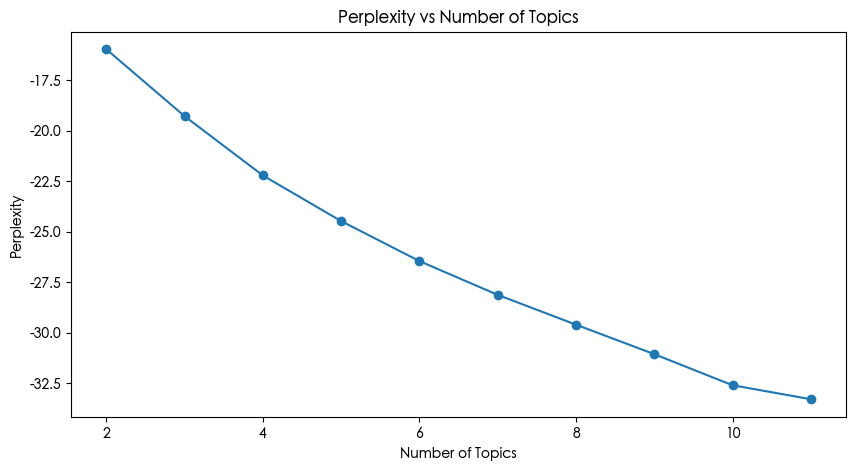

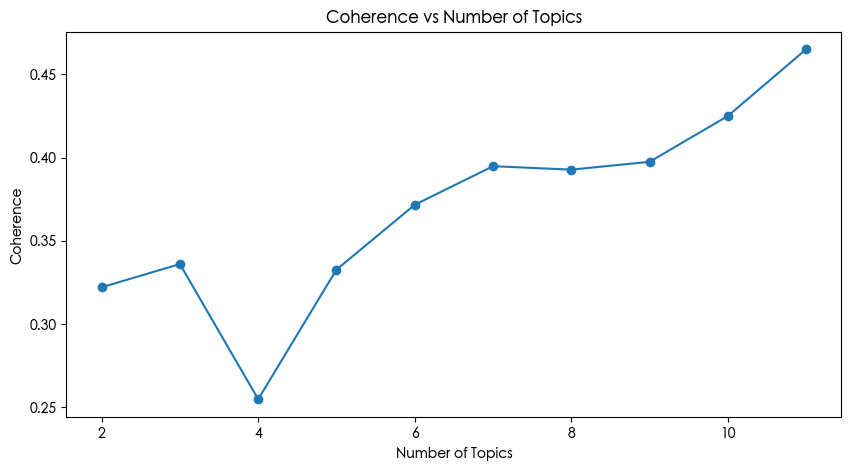

In [31]:
import matplotlib.pyplot as plt
# add this line of code to specify the default font, to solve the Chinese display gibberish problem
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # specifies that the default font is bold or song
plt.rcParams['axes.unicode_minus'] = False  # solves the problem that a minus sign is a box
# generate X-axis data
x_values = list(range(min_topics, max_topics + 1))

# draw lines of confusion
plt.figure(figsize=(10, 5))
plt.plot(x_values, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.savefig('Perplexity.png')  # save
plt.show()

# # draw conformance line charts
plt.figure(figsize=(10, 5))
plt.plot(x_values, coherences, marker='o')
plt.title('Coherence vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')

plt.savefig('Coherence.png')  # save
plt.show()

This code is the topic word used to show the LDA topic model. The optimal number of topics is 7. The LdaModel () function is then called to model, passing in the corpus represented by TF-IDF, dictionaries, and other parameters such as Alpha, ETA, iterations, and random.

Next, use the pprint () function in the pprint library to present the topic. This function calls the show () method of the LDA object, specifying the number of topics to display and the number of words in each topic. This allows you to print out the words and their weights for each topic, so you can see what features each topic represents.

Overall, this code is used to show representative words for different topics in the LDA topic model to better understand what each topic covers.

In [33]:
import pprint
#===optimal number of topics
num_topics=7  #number of themes
lda =  LdaModel(
                corpus=corpus_tfidf,
                id2word=dictionary,
                alpha=0.001,
                eta=0.0001,
                iterations=100,
                num_topics=num_topics,
                random_state=6
                
                )

#show themes
pprint.pprint(lda.show_topics(num_topics=num_topics,num_words=30))

[(0,
  '0.004*"机构" + 0.003*"一個" + 0.003*"服务" + 0.003*"厅长" + 0.003*"视频" + 0.003*"集团" '
  '+ 0.003*"酒店" + 0.003*"银行" + 0.003*"收到" + 0.003*"原因" + 0.003*"公寓" + '
  '0.003*"客户" + 0.003*"工人" + 0.003*"防骗" + 0.003*"唐楼" + 0.002*"支票" + 0.002*"投诉" '
  '+ 0.002*"留學" + 0.002*"水电费" + 0.002*"舍友" + 0.002*"客厅" + 0.002*"早上" + '
  '0.002*"小心" + 0.002*"收费" + 0.002*"海韵" + 0.002*"确实" + 0.002*"地板" + 0.002*"女生" '
  '+ 0.002*"专业" + 0.002*"电梯"'),
 (1,
  '0.004*"骗子" + 0.003*"东西" + 0.003*"二房东" + 0.003*"酒店" + 0.003*"损失" + '
  '0.003*"公寓" + 0.003*"留學" + 0.003*"诈骗" + 0.003*"钥匙" + 0.003*"步行" + 0.003*"大学" '
  '+ 0.003*"硕士" + 0.003*"小心" + 0.003*"视频" + 0.003*"退房" + 0.003*"名城" + '
  '0.003*"地产" + 0.003*"年付" + 0.003*"男人" + 0.002*"清洁" + 0.002*"举报" + 0.002*"分享" '
  '+ 0.002*"港岛" + 0.002*"赔偿" + 0.002*"地方" + 0.002*"不用" + 0.002*"潮湿" + '
  '0.002*"同意" + 0.002*"崩溃" + 0.002*"支票"'),
 (2,
  '0.007*"印花税" + 0.004*"黑心" + 0.004*"二房东" + 0.004*"负责" + 0.004*"香港中文大学" + '
  '0.004*"厘印" + 0.003*"签订" + 0.003*"公寓" + 0.003*"无良" + 0.003*"咨询" + 0

In [ ]:
This code uses the PYL Davis Library to demonstrate an interactive visualization of the LDA theme model. First, Pyl Davis. EXE is introduced through the import statement. Gensim and Pyldavis are two modules, and use pyLDAvis. The enable () function enables the settings required to display pyl Davis visualization in a notebook.

Next, call Pyldavis. The prepare () function in the gensim module, passing in the LDA object, the document-word matrix corpus, and the dictionary as arguments to prepare the visualization of the LDA topic model. This function processes the LDA model, computes the distribution of topics and word correlations, and returns a data object vis for presentation.

Finally, call Pyldavis. The display () function shows the created visualization object vis to display the interactive LDA Topic model visualization results in notebook. With this visualization tool, users can visually see the similarities and differences between topics, as well as the most representative word and document distributions within each topic. Such interactive visualizations help to better understand and interpret the results of LDA models.

In [38]:
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()

# Assume that LDA is your LDA model, corpus is the document-word matrix, and dictionary is your dictionary
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary,sort_topics=False)
pyLDAvis.display(vis)

In [39]:
#===save
data_lda = lda.get_document_topics(corpus,minimum_probability=0)
data_lda = pd.DataFrame([dict(data_lda[i]) for i in range(data.shape[0])])
data_lda.columns=['topic{}'.format(i) for i in range(num_topics)]
for i in range(num_topics):
    data['topic{}'.format(i)] = data_lda['topic{}'.format(i)].values
data['max_topic'] = np.argmax(data[['topic{}'.format(i) for i in range(num_topics)]].values,axis=1)
data.to_excel('7data+ldaout{}.xlsx'.format(num_topics),index=0)

In [40]:
import pyLDAvis.gensim_models # saves the result as this html file # saves the result as this html file
d=pyLDAvis.gensim_models .prepare(lda, corpus, dictionary,sort_topics=False)# saves the result as this html file # saves the result as this html file
pyLDAvis.save_html(d, '7lda_pass10.html')  # saves the result as this html file # saves the result as this html file

In [41]:
import itertools
import collections
import pandas as pd
import numpy as np
#===save
topic = []
for i in range(num_topics):
    topic.append(np.array(lda.show_topic(i,topn=100))[:,0])
    topic.append(np.array(lda.show_topic(i,topn=100))[:,1])
topic = pd.DataFrame(topic).T
topic.columns = list(itertools.chain(*[['topic{}_word'.format(i),'topic{}_distribution'.format(i)] for i in range(num_topics)]))
topic.to_excel('7LDAtopic-distribution{}.xlsx'.format(num_topics))


Next is the need for lightning protection of the type of housing analysis

In [43]:
import os  # import module
os.chdir(r'/Users/ringmum/Desktop/测试2/lda' )  #  switch to the destination path the R prefix indicates that this is a raw string
print(os.getcwd())  # function gets the current working directory, that is, the directory path where the current Python script works

/Users/ringmum/Desktop/测试2/lda


In [44]:
import pandas as pd

# read the first Excel file containing words
word_frequency_df = pd.read_excel('all word frequency1.xlsx')
word_list = word_frequency_df['word'].tolist()  # Gets the words in the 'word' column
word_list

['房东',
 '中介',
 '合同',
 '押金',
 '看房',
 '转租',
 '房源',
 '室友',
 '退租',
 '公寓',
 '签约',
 '家具',
 '合租',
 '机构',
 '服务',
 '印花税',
 '酒店',
 '二房东',
 '地方',
 '骗子',
 '分享',
 '避坑',
 '视频',
 '东西',
 '便宜',
 '装修',
 '诈骗',
 '一点',
 '不到',
 '同意',
 '专业',
 '地产',
 '水电',
 '维修',
 '物业',
 '几个',
 '环境',
 '中介费',
 '小区',
 '清洁',
 '黑心',
 '电话',
 '地铁站',
 '客厅',
 '方式',
 '留學',
 '出租',
 '支付',
 '证明',
 '法律',
 '钥匙',
 '收到',
 '不用',
 '干净',
 '不想',
 '空调',
 '过程',
 '定金',
 '银行',
 '负责',
 '态度',
 '不错',
 '提出',
 '硕士',
 '年付',
 '原因',
 '代理',
 '不好',
 '经验',
 '签合同',
 '经历',
 '告知',
 '正式',
 '合适',
 '期间',
 '晚上',
 '工人',
 '平台',
 '分钟',
 '骗局',
 '租期',
 '厨房',
 '小时',
 '学生公寓',
 '帮忙',
 '客户',
 '签订',
 '本来',
 '后续',
 '确实',
 '电梯',
 '保障',
 '洗衣机',
 '喜欢',
 '相关',
 '大围',
 '大学',
 '需求',
 '有人',
 '记录',
 '预算',
 '资料',
 '回复',
 '女生',
 '包括',
 '通知',
 '地铁',
 '步行',
 '成功',
 '实地',
 '账户',
 '想要',
 '网上',
 '退房',
 '接受',
 '按金',
 '麻烦',
 '区域',
 '线下',
 '咨询',
 '中文',
 '条件',
 '记得',
 '好多',
 '拿到',
 '协议',
 '提醒',
 '协商',
 '小心',
 '居住',
 '参考',
 '证据',
 '交通',
 '没想到',
 '临时',
 '条款',
 '单位',
 '材料',
 '空间',
 '打扫',
 '唐楼',
 '土地

In [45]:
import pandas as pd

# read the first Excel file containing words
word_frequency_df = pd.read_excel('17all word frequency1.xlsx')
word_list = word_frequency_df['word'].tolist()  # 获取 'word' 列的词语

# read the second Excel file containing words
all_words_df = pd.read_excel('all word frequency1.xlsx')

# Create a dictionary to store words and their frequency
frequency_dict = {}

# traverse the words, find the frequency
for word in word_list:
    count = all_words_df.loc[all_words_df['word'] == word, 'count']
    if not count.empty:  # if the word is found
        frequency_dict[word] = count.values[0]

# convert dictionary to DataFrame
result_df = pd.DataFrame(list(frequency_dict.items()), columns=['word', 'count'])

# Save the results to an Excel file
result_df.to_excel('House Frequency Statistics.xlsx', index=False)


In [46]:
result_df

,word,count
0,公寓,171
1,酒店,112
2,小区,77
3,学生公寓,60
4,唐楼,48
5,大厦,40
6,宿舍,27
7,酒店式,18
8,公屋,18
9,洋楼,16


In [ ]:
# Housing location keywords analysis

In [ ]:
## Par1 1 Tokenizing and filtering

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!python -m spacy download zh_core_web_sm

In [ ]:
import csv
import spacy

# load the spaCy model that supports Chinese
nlp = spacy.load('zh_core_web_sm')

# CSV file path
csv_file_path = 'D:\5507\小红书\combined_output.csv'

# stores extracted text
texts = []

# read the CSV file
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        #  extract the text column
        text = row['content']

        # preprocess the text
        text = text.strip()  # removes leading and trailing white space characters, and Chinese text generally does not need to be converted to lowercase

        # add processed text to the list
        texts.append(text)

# use spaCy to work with text
for text in texts:
    doc = nlp(text)
    # urther operations such as entity extraction, part-of-speech tagging can be done here
    # for example, print the text of each sentence
    for sent in doc.sents:
        print(sent.text)


In [ ]:
type(texts)

In [ ]:
import spacy

# Make sure you have installed Spacy's Chinese model
# python -m spacy download zh_core_web_sm

# load the Chinese model
nlp = spacy.load("zh_core_web_sm")

# suppose this is your list, containing multiple string values
list_of_strings = texts

# Use the join method to merge all the strings in the list into a single string
combined_text = " ".join(list_of_strings)

#  use SpaCy for the merged string
doc = nlp(combined_text)

# output, here is a Doc object
print(doc)

In [ ]:
import spacy

# load the model
nlp = spacy.load("zh_core_web_sm")

# print result
for token in doc:
    print(f"{token.text} ({token.pos_})")

# Named entity recognition
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

In [ ]:
# choose all the nouns tokens
nouns = [token for token in doc if token.pos_ == "NOUN"]

# output the text of the noun tokens
for noun in nouns:
    print(noun.text)

In [ ]:
type(nouns)

In [ ]:
# choose all the nouns tokens
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

# specify an absolute path, such as creating a file in the root of the C drive in Windows
# please modify the path according to your operating system and requirements
file_path = '/content/drive/My Drive/nouns.txt'

# write the text of the noun tokens to the file
with open(file_path, 'w', encoding='utf-8') as file:
    for noun in nouns:
        file.write(noun + '\n')  # Write nouns and add line breaks after each noun

In [ ]:
# ilter for words with the part of speech“PROPN”
props = [token.text for token in doc if token.pos_ == 'PROPN']

# create a new folder (if it doesn't exist)
file_path2 = '/content/drive/My Drive/propn_file.txt'

# new files saved to a new folder
with open(file_path2 + 'props.txt', 'w') as file:
    for prop in props:
        file.write(prop + '\n')

print("Filter and save done.")

In [ ]:
## Part 2 word Frequency count

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# reads a text file, specifying the delimiter
df_1 = pd.read_table('/content/drive/My Drive/nouns.txt', sep='\t')  # assume tab separation

df_2 = pd.read_table('/content/drive/My Drive/propn_file.txtprops.txt', sep='\t')


In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# assume that DF has been read and that the text data is in a column named 'text'
# If your column name is different, change the column name accordingly
# 1. Merges text columns in a DataFrame
text_data = ' '.join(df_1['真心'].astype(str))

# 2. If word segmentation is required, use a word segmentation tool, such as jieba
# Note: You Need to install Jieba first. If not, use pip install jieba
import jieba
words = jieba.lcut(text_data)

# 3. Reads the stop word file and creates a stop word collection
stop_words_files = [
    '/content/drive/MyDrive/中文停用词/baidu_stopwords.txt',
    '/content/drive/MyDrive/中文停用词/cn_stopwords.txt',
    '/content/drive/MyDrive/中文停用词/hit_stopwords.txt',
    '/content/drive/MyDrive/中文停用词/scu_stopwords.txt',
    '/content/drive/MyDrive/中文停用词/自定义停用词.txt',
    '/content/drive/MyDrive/中文停用词/自定义停用词2.txt'
]
stopwords = set()

for file in stop_words_files:
    with open(file, 'r', encoding='utf-8') as f:
        stopwords.update(f.read().splitlines())

# 4. Filter stop words
filtered_words = [word for word in words if word not in stopwords]

#  5. Count word frequencies using Counter
word_counts = Counter(filtered_words)

# 6. Visualize the results
# get the most common 100 words
common_words = word_counts.most_common(100)
words, counts = zip(*common_words)

# print the most common words
print(common_words)

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import jieba

# ... Previous code includes reading text, word segmentation, filtering stop words, and counting word frequency
# 7. Converts word frequency statistics to a DataFrame
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# print DataFrame
print(word_freq_df)

# save the DataFrame to a CSV file if necessary
word_freq_df.to_csv('/content/drive/MyDrive/word_freq1.csv', index=False, encoding='utf-8')


In [ ]:
## Part 3 final result 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

# suppose we have two CSV files, file1. CSV and File2. CSV
# read two files to DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/word_freq1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/word_freq2.csv')

# suppose we want to select rows from DF1 with indexes of 0 and 1
selected_rows_df1 = df1.loc[[6, 17, 73, 83]]

# suppose we want to select rows from DF2 with indexes 2 and 3
selected_rows_df2 = df2.loc[[1, 2, 10, 11, 19, 26, 45, 65, 67, 73]]

# Use the CONCAT function to merge the selected rows
# ignore means that the merged DataFrame will rebuild the index
combined_selected_rows = pd.concat([selected_rows_df1, selected_rows_df2], ignore_index=True)

# output the merged DataFrame
print(combined_selected_rows)


In [ ]:
# Save the DataFrame to a CSV file if necessary
combined_selected_rows.to_csv('/content/drive/MyDrive/word_freq3.csv', index=False, encoding='utf-8')

In [ ]:
combined_selected_rows.head(14)

In [ ]:
from matplotlib import pyplot as plt
_df_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)